In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Gerar dados: Y = Ax + erro
np.random.seed(42)
n_samples = 100
X = np.random.uniform(-3, 3, n_samples).reshape(-1, 1)
A = 2.5
Y = A * X.flatten() + np.random.normal(0, 2, n_samples)

# Dividir os dados em treino, validacao e teste
X_train, X_rest, Y_train, Y_rest = train_test_split(X, Y, test_size=0.5, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_rest, Y_rest, test_size=0.5, random_state=42)

Grau 1: MSE Treino = 3.36 | MSE Teste = 2.63


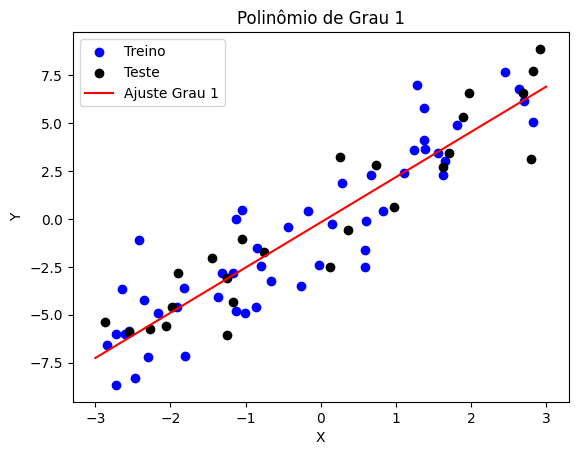

Grau 5: MSE Treino = 3.03 | MSE Teste = 3.00


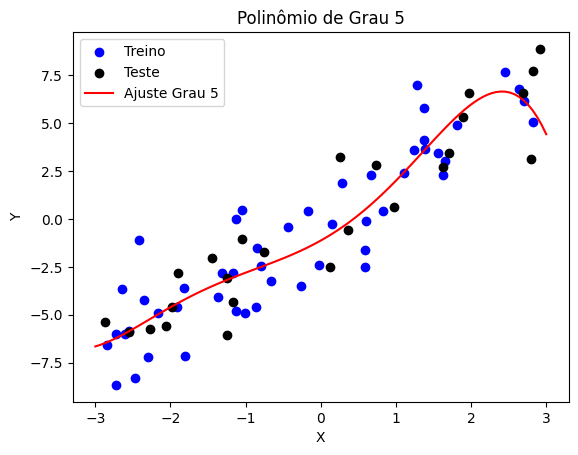

Grau 10: MSE Treino = 2.85 | MSE Teste = 6.25


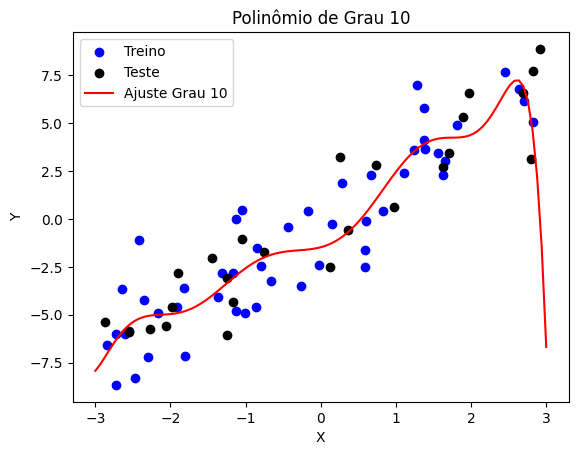

 Validação - Grau 1: MSE = 3.65
 Validação - Grau 5: MSE = 3.73
 Validação - Grau 10: MSE = 4.21

Melhor grau escolhido com base na validação: 1


In [9]:
degrees = [1, 5, 10]

# Parte 1: Ajuste no treino e cálculo do erro no treino e no teste
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)
    
    mse_train = mean_squared_error(Y_train, Y_train_pred)
    mse_test = mean_squared_error(Y_test, Y_test_pred)
    
    print(f"Grau {d}: MSE Treino = {mse_train:.2f} | MSE Teste = {mse_test:.2f}")
    
    # Plotar cada ajuste em gráfico separado
    plt.figure()
    plt.scatter(X_train, Y_train, color='blue', label="Treino")
    plt.scatter(X_test, Y_test, color='black', label="Teste")
    
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    X_plot_poly = poly.transform(X_plot)
    Y_plot = model.predict(X_plot_poly)
    
    plt.plot(X_plot, Y_plot, color='red', label=f"Ajuste Grau {d}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Polinômio de Grau {d}")
    plt.legend()
    plt.show()

# Parte 2: Seleção de grau via validação
val_errors = []
for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    Y_val_pred = model.predict(X_val_poly)
    mse = mean_squared_error(Y_val, Y_val_pred)
    val_errors.append(mse)
    print(f" Validação - Grau {d}: MSE = {mse:.2f}")

best_degree = degrees[np.argmin(val_errors)]
print(f"\nMelhor grau escolhido com base na validação: {best_degree}")